<a href="https://colab.research.google.com/github/andytamtran/Test/blob/main/lab6_retailer_eda_andy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset.  Your target variable is total sales revenue.  


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [47]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe.  
- If your record count doesn't match the source file, then resolve the issue

In [48]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/superstore_retail_orders.csv')

print (df)

Mounted at /content/gdrive
       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01          2021-07     Audrey Blanco   
1         51187  2021-07-01          2021-07       Isaac Allen   
2         51199  2021-07-02          2021-07        Ian Morgan   
3         51241  2021-07-04          2021-07        Alexa Bell   
4         51297  2021-07-08          2021-07        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29          2022-06        Ian Rogers   
56041     74062  2022-06-29          2022-06   Marcus Anderson   
56042     74065  2022-06-29          2022-06  Nathaniel Howard   
56043     74038  2022-06-29          2022-06        Robin Sanz   
56044     74110  2022-06-30          2022-06   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland  WEST VIRGINIA           

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Create a total_amount variable, based on the product price and quantity

In [49]:

df['order_id'] = pd.to_numeric(df['order_id'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')

df['customer_name'] = df['customer_name'].astype('category')
df['city'] = df['city'].astype('category')
df['state_province'] = df['state_province'].astype('category')
df['product_name'] = df['product_name'].astype('category')
df['product_line'] = df['product_line'].astype('category')

In [50]:
df.dropna()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
...,...,...,...,...,...,...,...,...,...,...
56040,74084,2022-06-29,2022-06,Ian Rogers,Port Mark,ALABAMA,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56041,74062,2022-06-29,2022-06,Marcus Anderson,West Aprilfurt,NEBRASKA,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56042,74065,2022-06-29,2022-06,Nathaniel Howard,New Lindaview,ILLINOIS,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62
56043,74038,2022-06-29,2022-06,Robin Sanz,West Frankhaven,ARKANSAS,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62


## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales Revenue
- Create a bar chart
- Create a box plot
- Create a scatter plot
Each visualization should bring some insight into the total sales. You can use any variables for these sample plots.

In [51]:
# Create total_amount column
df['total_amount'] = df['quantity'] * df['product_price']

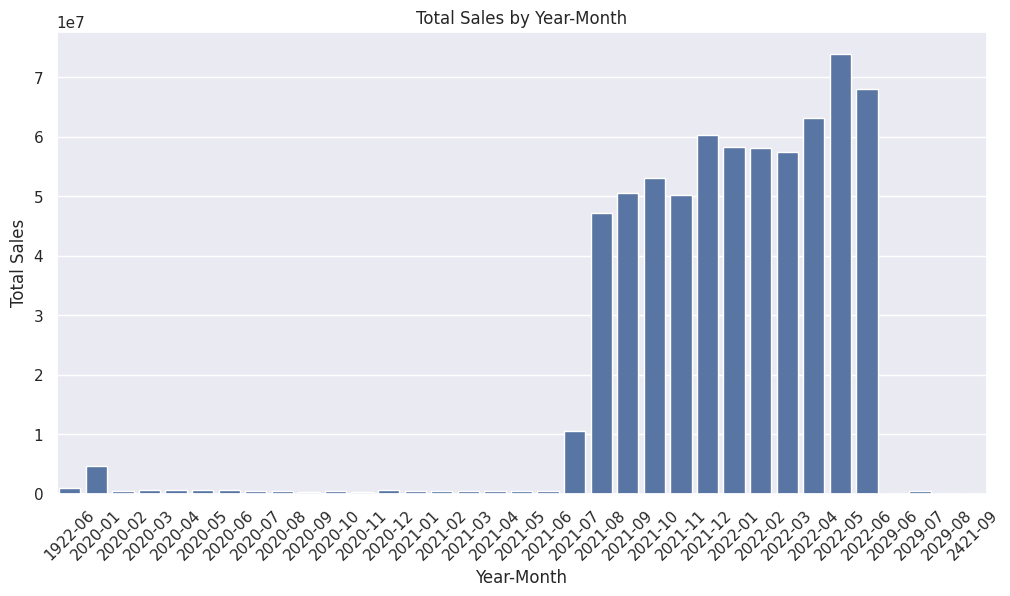

In [52]:
## Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='order_year_month', y='total_amount', data=df.groupby('order_year_month')['total_amount'].sum().reset_index())
plt.title('Total Sales by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

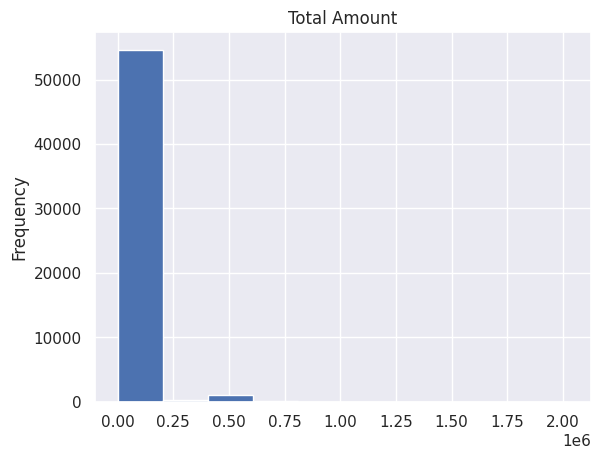

In [53]:
hist = df['total_amount'].plot.hist(bins=10,title='Total Amount')

<Axes: title={'center': 'quantity'}, xlabel='[product_price]'>

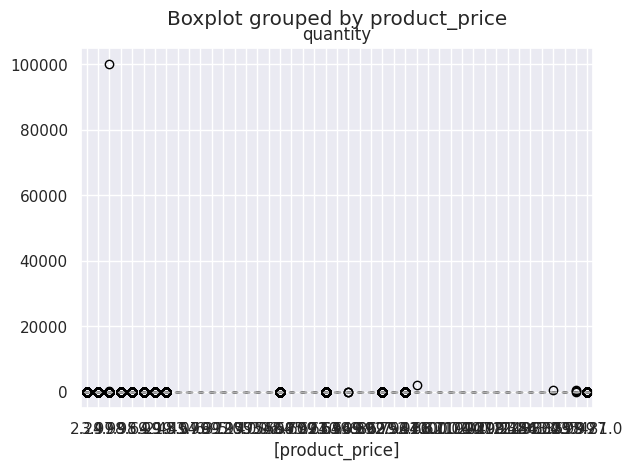

In [54]:
df[['quantity','product_price']].boxplot(by='product_price')

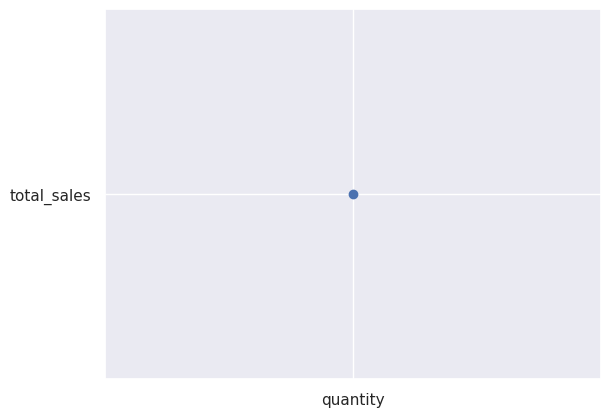

In [55]:
plt.scatter('quantity', 'total_sales')

## Explore Relationships

➡️ Assignment Tasks
Your target variable is Total Sales  
- How does the month of year affect sales?
- What are the best states for sales?
- What are the best and worst products for sales?

In [56]:
#month of year
result = df.groupby('order_year_month')['total_amount'].sum().reset_index()
print(result)

   order_year_month  total_amount
0           1922-06     979559.95
1           2020-01    4745149.93
2           2020-02     530915.09
3           2020-03     710043.07
4           2020-04     651707.84
5           2020-05     657669.70
6           2020-06     668056.44
7           2020-07     484113.64
8           2020-08     534106.43
9           2020-09     341233.48
10          2020-10     401585.26
11          2020-11     323436.76
12          2020-12     559483.05
13          2021-01     429458.43
14          2021-02     470781.45
15          2021-03     468580.53
16          2021-04     488745.56
17          2021-05     540842.34
18          2021-06     529408.57
19          2021-07   10495978.77
20          2021-08   47239239.96
21          2021-09   50625473.56
22          2021-10   53123132.48
23          2021-11   50213508.07
24          2021-12   60364261.25
25          2022-01   58216747.14
26          2022-02   58175468.30
27          2022-03   57460161.50
28          20

In [57]:
result = df.groupby(['order_year_month', 'state_province'])['total_amount'].sum().reset_index()
print(result)

     order_year_month             state_province  total_amount
0             1922-06  ALABAMA                            0.00
1             1922-06  ALASKA                             9.98
2             1922-06  ARIZONA                            0.00
3             1922-06  ARKANSAS                           0.00
4             1922-06  CALIFORNIA                      2141.86
...               ...                        ...           ...
1885          2421-09  VIRGINIA                           0.00
1886          2421-09  WASHINGTON                         0.00
1887          2421-09  WEST VIRGINIA                      0.00
1888          2421-09  WISCONSIN                          0.00
1889          2421-09  WYOMING                         1112.10

[1890 rows x 3 columns]


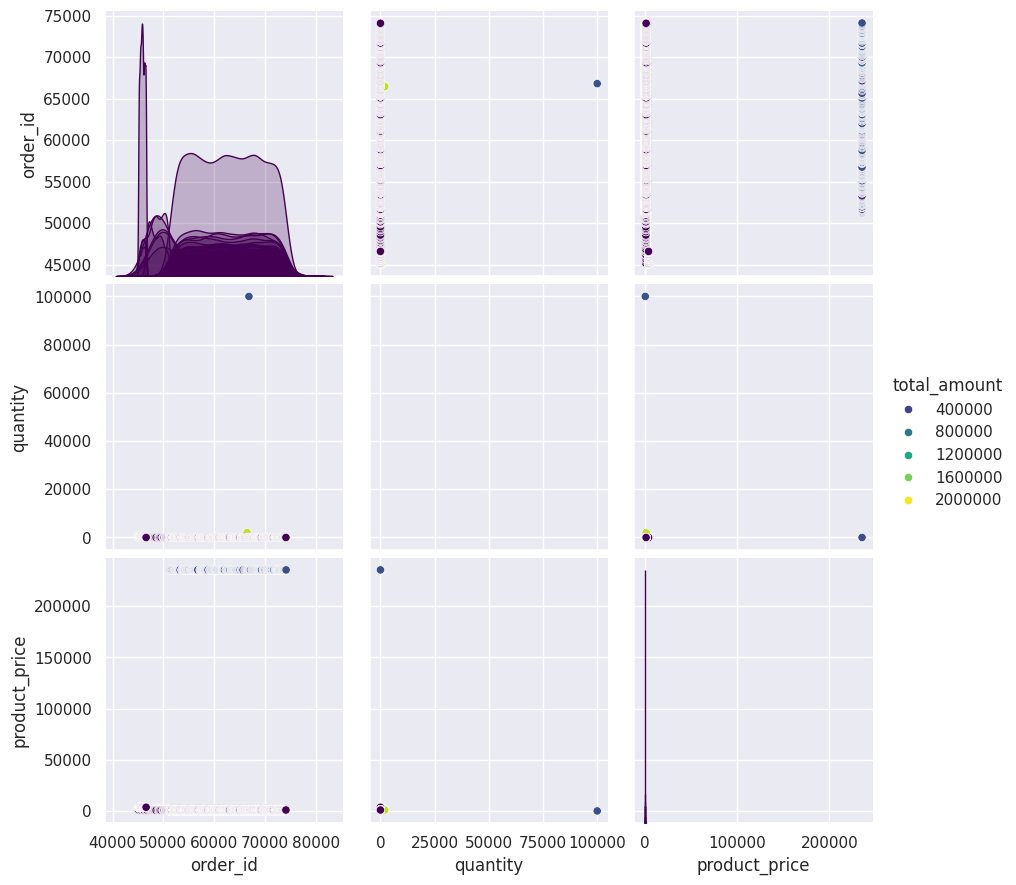

In [58]:
#pair plot
sns.set(style="darkgrid")
sns.pairplot(df, hue='total_amount', palette='viridis', diag_kind='kde', height=3)
plt.show()